In [1]:
'''@author : Kunmao Li'''
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
'''
13 variables: X,Y(sptial coordinate)
			  month,day(time index)
			  FFMC,DMC,DC,ISI(model features)
			  temp,RH,wind,rain(natural features)
			  area(fire/no fire)
'''		
fire = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
fire.month=fire.month.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})
fire.day=fire.day.map({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5,'sat':6,'sun':7})
fire['ln(area+1)']=np.log(fire['area']+1) # logorithm transform
fire['FIRE'] = np.where(fire['ln(area+1)']>0, 'fire', 'no fire') # convert burned area to 'fire' and other area without fire to 'no fire'
'''
filter out the data regarding temperatures in summer months 
: type fire['summer_temp']: pandas.core.series.Series
: param fire['summer_temp']: temperatures in summer months
'''
fire['summer_temp']=np.where(fire['temp'],0,0) # set a copy 
a=fire.loc[fire['month']<10]
a=a.loc[a['month']>4] # filter the summer months 
fire['summer_temp']=a['temp'] # filter the temperatures in summer months
fire['summer_temp']=np.where(fire['summer_temp']>0,fire['summer_temp'],0) # set all 'NaN' to '0'

'''
filter out the data regarding fire cases 
:type c: pandas.core.frame.DataFrame
: param c: dataframe containing data only in fire cases 
'''
c=fire.loc[fire['FIRE']=='fire']

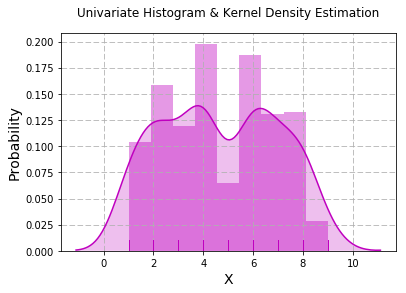

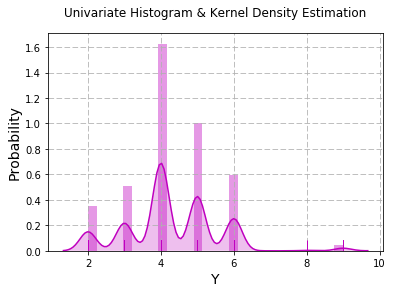

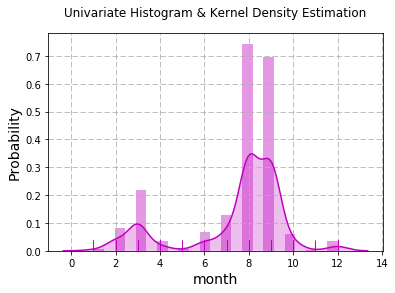

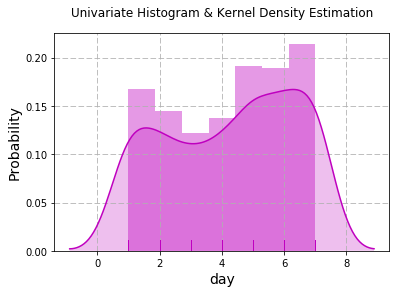

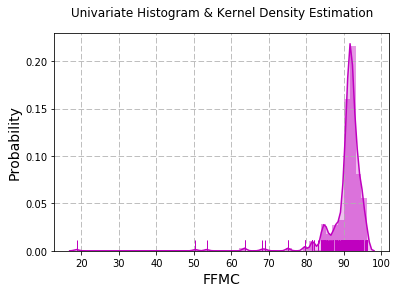

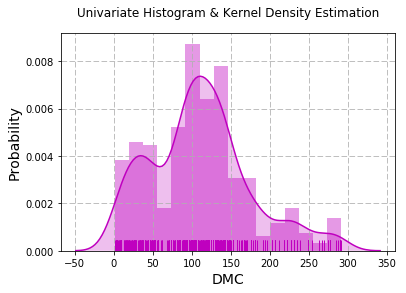

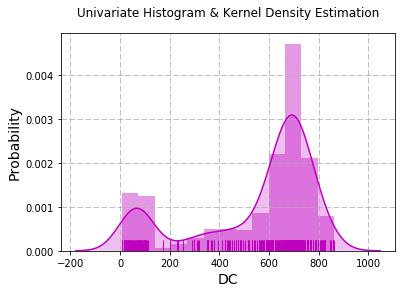

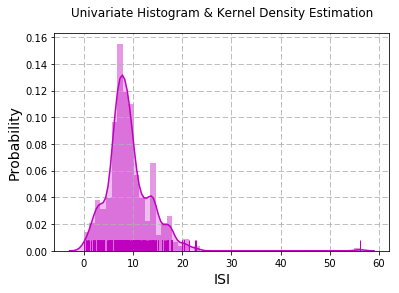

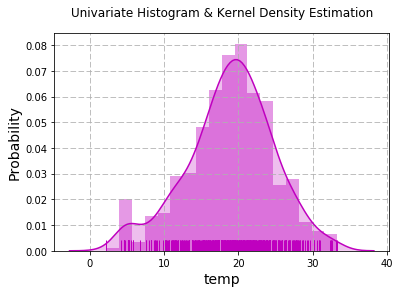

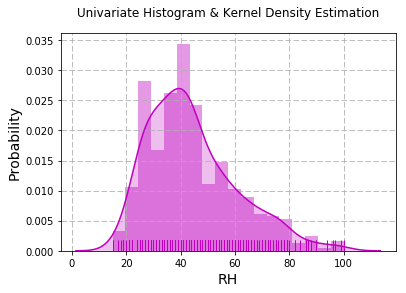

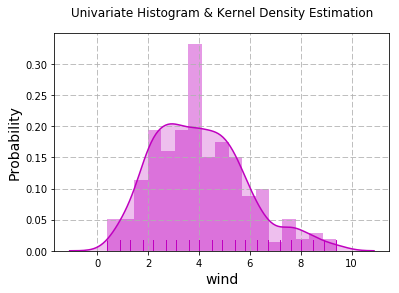

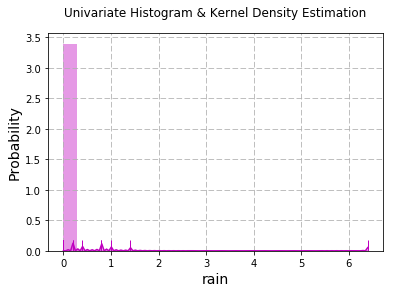

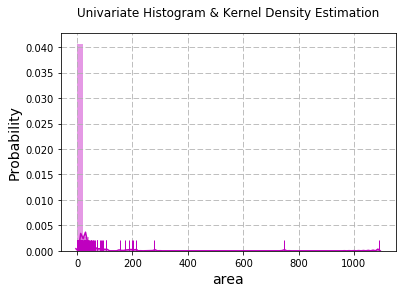

In [2]:
'''
: Function name: singleparameterdistribution
: Function works to demonstrate the distribution of all single variables in our dataset
  There are three distribution modes: 1) histograms (hist=True), color palatte:'r' 
  									  2) kernel density estimation plots(kde=True), color palatte:'g'
  									  3) combination of both(hist=True,kde=True), color palatte:'m'
: type variable: list[str]
: param variable: list containing any from ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
: type figNo: int
: param figNo: number of figures plot= number of variables plot
	
'''

def singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13):
  	assert isinstance(variable,list)
  	assert isinstance(figNo,int)
  	assert figNo==len(variable) #number of figures plot= number of variables plot
  	for i in range(figNo):
  		assert isinstance(variable[i],str)
  		assert variable[i] in ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']# no input variable outside dataset
  		plt.figure(i)
  		if hist==True and kde==False: # Univariate Histograms
  			t='Univariate Histogram'
  			y='Frequency'
  			clr='r'
  		elif kde==True and hist==False:# Kernel Density Estimation
  			t='Kernel Density Estimation'
  			y='Probability'
  			clr='g'
  		else: # combination of two plots
  			t='Univariate Histogram & Kernel Density Estimation'
  			y='Probability'
  			clr='m'
  		plt.title(t,fontsize=12,position=(0.5,1.05))
  		plt.ylabel(y,fontsize=14)
  		plt.xlabel(variable[i],fontsize=14)
  		plt.grid(linestyle='--') # add grids
  		sns.distplot(fire[variable[i]],kde=kde,hist=hist,kde_kws={'shade':kde},color=clr,rug=True)# add shades to kde plots and rug plots to all three kinds of plots
  		plt.show()

singleparameterdistribution(kde=True,hist=True,variable=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'],figNo=13)


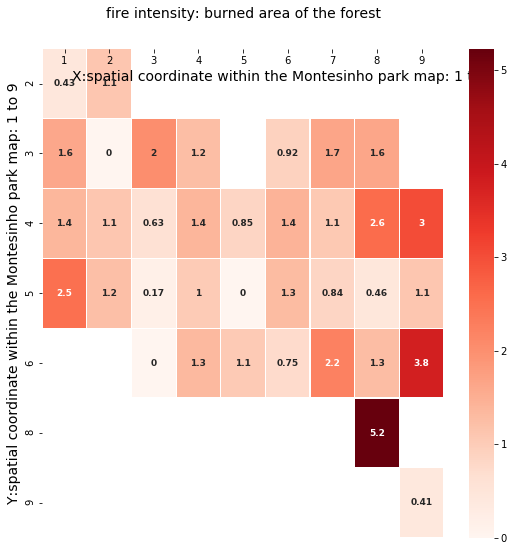

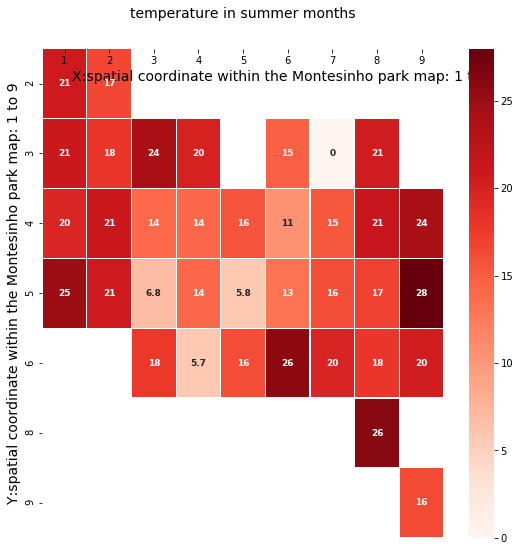

In [3]:
'''
: Function name: heatmap
: Function works to demonstrate the heatmap reagarding fire intensity or summer temperture distribution
  There are two kinds of heatmaps available: 
  		1) fire cases with spatial coordinates (coordinate=True)
  		2) summer temperatures with spatial coordinates (temperature=True)
: type figNo: int
: param figNo: number of figures plot
: type clr_background: str
: param clr_background: color palatte chosen for heatmaps, users can only set the color palattes available in Seaborn database
	
'''

def heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds'):
	assert isinstance(figNo,int)
	assert figNo==coordinate+temperature # number of figures plots should match 
	df1=pd.DataFrame(fire,columns=['X','Y','ln(area+1)']) # set the dataframe for fire intensity 
	pt1=df1.pivot_table(index='Y', columns='X', values='ln(area+1)') #set the table and group the variables
	t1='fire intensity: burned area of the forest'

	df2=pd.DataFrame(fire,columns=['X','Y','summer_temp'])# set the dataframe for summer temperatures
	pt2=df2.pivot_table(index='Y', columns='X', values='summer_temp') #set the table and group the variables
	t2='temperature in summer months'

	for i in range(figNo): 
		if coordinate==True and temperature==False:
			pt=[pt1] # set the pivot table
			t=[t1] # set the title 
		elif temperature==True and coordinate==False:
			pt=[pt2] # set the pivot table
			t=[t2] # set the title 
		else:
			pt=[pt1,pt2] # set the pivot table
			t=[t1,t2] # set the title 
		plt.figure(i)
		f,ax=plt.subplots(figsize = (9, 9)) # set figure size
		ax.spines['bottom'].set_position(('data', 0)) # set the position for axis
		ax.spines['left'].set_position(('data', 0))
		sns.heatmap(pt[i], cmap = clr_background, linewidths = 0.1,ax = ax,annot=True, annot_kws={'size':9,'weight':'bold'})
		# pt[i]: point to the pivot tables for different kinds of heatmaps
		#annot: annotate data values in the box of heat map
		plt.xlabel('X:spatial coordinate within the Montesinho park map: 1 to 9',fontsize=14,position=(0.6,1.05))
		plt.ylabel('Y:spatial coordinate within the Montesinho park map: 1 to 9',fontsize=14)
		plt.title(t[i],fontsize=14, position=(0.5,1.05)) # t[i]: point to the titles for different kinds of heatmaps
	plt.show() 
    
heatmap(coordinate=True,temperature=True,figNo=2,clr_background='Reds')

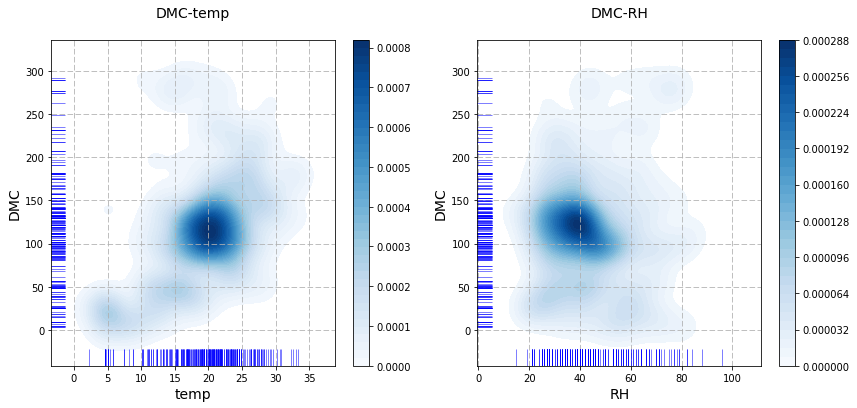

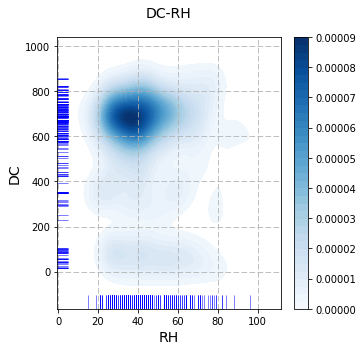

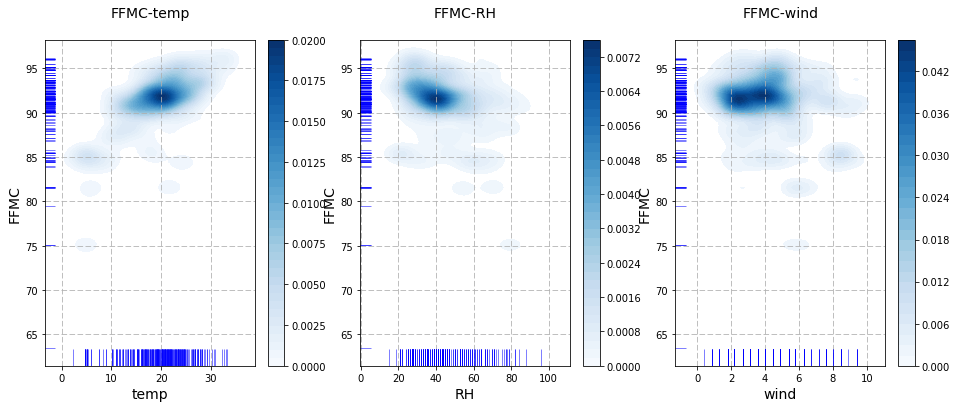

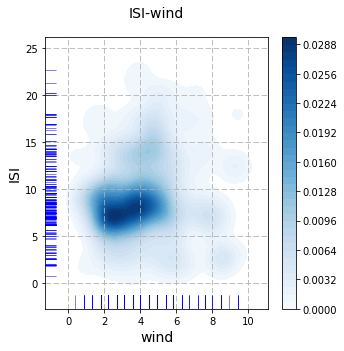

In [4]:
'''
: Function name: ModelFeature_kdeplots
: Function works to demonstrate the kdeplots reagarding fire intensity with model features against natural features
  Explanation of kde plots: 
  		1) x-axis: natural feature from ['temp','RH','wind'] P.S.: rain has been ignored since 99.6% of its data =0 which will have no density in kdeplots
  		2) y-aixs: model feature from ['DMC','DC','FFMC','ISI']
  		3) color shades: fire intensity by values of 'ln(area+1)'
  		4) color bar: demonstrating the change and scope of values from 'ln(area+1)'
  		5) rug plots at each axis: mark the values of natural feature/model feature
  		6) scatters: locate the fire cases 
: type model_nature: dict{str:list}
: param model_nature: model_nature.keys():model features
					  model_nature.values(): a list of natural features that influence the corresponding key/model feature
					  P.S.: If user relate a natural feature having no relationship with the model feature in the dict, assertion error will be thrown 
: type figNo: int
: param figNo: number of figures plot= number of model features in dict 
: type clr_background: str
: param clr_background: color palatte chosen for kdeplots, users can only set the color palattes available in Seaborn database
: type clr_rugplots: str
: param clr_rugplots: color palatte chosen for rugplots, users can only set the color available in Seaborn database
: type scatters: bool
: param scatters: whether to show scatters in kdeplots(True/False)
	
'''

def ModelFeature_kdeplots(model_nature={'DMC':['temp','RH']},figNo=2,clr_background='Blues',clr_rugplots='blue',scatters=True):
	assert isinstance(model_nature,dict)
	assert isinstance(figNo,int)
	assert figNo==len(model_nature.keys()) #number of figures plot= number of model features in dict 
	assert isinstance(clr_background,str)
	assert isinstance(clr_rugplots,str)
	
	for i in model_nature.keys():
		assert isinstance(i,str) and i in ['DMC','DC','FFMC','ISI'] #only the model feature in dataset
		assert isinstance(model_nature[i],list)
		if i == 'DMC': # the following if/else commands make sure users can only match the model feature with those natural ones having influence on it 
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['temp','RH'] # DMC can only be related to temperature and relative humidity
		elif i=='DC':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['RH']
		elif i=='FFMC':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['temp','RH','wind']
		elif i=='ISI':
			for j in model_nature[i]:
				assert isinstance(j,str) and j in ['wind']
	
	for i in range(figNo):
		x=[i for i in model_nature.keys()]# a lits of all model features entered
		m=len(model_nature[x[i]]) # the number of natural features for one model feature 
		n=100+10*m+1 # the index of subplot
		if m==1: figsize=(5,5)
		elif m==2: figsize=(14,6)
		else: figsize=(16,6) # set the figsize 
		plt.figure(i,figsize)
		for j in range(m):               
			plt.subplot(n)
			plt.title(x[i]+'-'+model_nature[x[i]][j], fontsize=14, position=(0.5,1.05))
			plt.xlabel(model_nature[x[i]][j],fontsize=14)
			plt.ylabel(x[i],fontsize=14)
			sns.kdeplot(c[model_nature[x[i]][j]],c[x[i]], # !! c is the new dataframe for data in firecases 
			           cbar = True,    # display color bar
			           shade = True,   # display shades
			           cmap = clr_background,  # set the color palatte
			           shade_lowest=False,  # not display periphery color/shade
			           n_levels = 40   # number of curves, the higher, the smoother
			           )# the color change indicates the change of density
			plt.grid(linestyle = '--')# show grids
			if scatters==True: #set scatters with their sizes, colors and shapes 
				plt.scatter(c[model_nature[x[i]][j]],c[x[i]], s=5, alpha = 0.5, color = 'r', marker='*') 
			sns.rugplot(c[model_nature[x[i]][j]], color=clr_rugplots, axis='x',alpha = 0.5) #set the rugplots 
			sns.rugplot(c[x[i]], color=clr_rugplots, axis='y',alpha = 0.5)
			n+=1
	plt.show()

ModelFeature_kdeplots(model_nature={'DMC':['temp','RH'],'DC':['RH'],'FFMC':['temp','RH','wind'],'ISI':['wind']},figNo=4,clr_background='Blues',clr_rugplots='blue',scatters=False)   

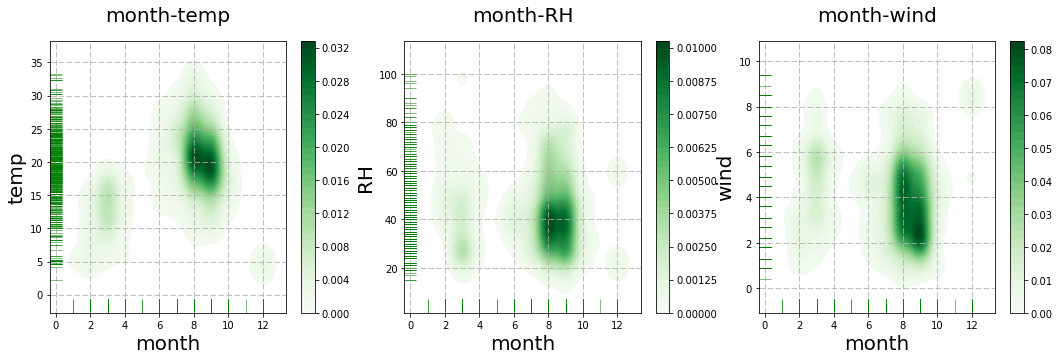

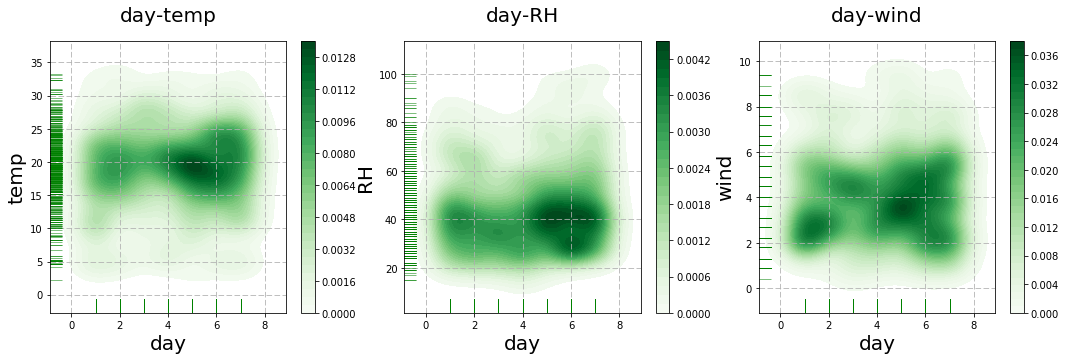

In [5]:
'''
: Function name: Time_Nature_kdeplots
: Function works to demonstrate the kdeplots reagarding fire intensity with natural features against time index(month/day)
  Explanation of kde plots: 
  		1) x-axis: time index (month/day)
  		2) y-aixs: natural feature from ['temp','RH','wind'] P.S.: rain has been ignored since 99.6% of its data =0 which will have no density in kdeplots
  		3) color shades: fire intensity by values of 'ln(area+1)'
  		4) color bar: demonstrating the change and scope of values from 'ln(area+1)'
  		5) rug plots at each axis: mark the values of natural feature/time index
  		6) scatters: locate the fire cases 
: type time_nature: dict{str:list}
: param time_nature: time_nature.keys():time index
					  time_nature.values(): a list of natural features 
: type figNo: int
: param figNo: number of figures plot= number of time indices in dict 
: type clr_background: str
: param clr_background: color palatte chosen for kdeplots, users can only set the color palattes available in Seaborn database
: type clr_rugplots: str
: param clr_rugplots: color palatte chosen for rugplots, users can only set the color available in Seaborn database
: type scatters: bool
: param scatters: whether to show scatters in kdeplots(True/False)
	
'''

def Time_Nature_kdeplots(time_nature={'month':['temp','RH','wind'],'day':['temp','RH','wind']},figNo=2,clr_background='Greens',clr_rugplots='green',scatters=True):
	assert isinstance(figNo,int) and figNo==len(time_nature.keys()) #number of figures plot= number of time indices in dict
	assert isinstance(time_nature,dict)
	assert isinstance(clr_background,str)
	assert isinstance(clr_rugplots,str)
	n=1 # figure index
	for i in time_nature.keys():
		assert isinstance(i,str) and i in ['month','day'] # the time indices available
		assert isinstance (time_nature[i],list)
		for v in time_nature[i]:
			assert v in ['temp','RH','wind'] # the natatural features available
		m=len(time_nature[i]) # the number of natural features for one time index
		q=100+10*m+1 # the index of subplot
		if m==1: figsize=(5,5)
		elif m==2: figsize=(14,6)
		else: figsize=(18,5) # set the figsize 
		plt.figure(n,figsize) 
		for j in range(m):	
			plt.subplot(q)
			plt.title(i+'-'+time_nature[i][j], fontsize=20, position=(0.5,1.05))
			plt.xlabel(i,fontsize=20)
			plt.ylabel(time_nature[i],fontsize=20)
			sns.kdeplot(fire[i],fire[time_nature[i][j]], # demonstrate the probability distribution of two variables
			           cbar = True,    		# display color bar
			           shade = True,   # display shades
			           cmap = clr_background,  # set the color palatte
			           shade_lowest=False,  # not display periphery color/shade
			           n_levels = 40   # number of curves, the higher, the smoother
			           )# the color change indicates the change of density
			plt.grid(linestyle = '--') # show grids 
			if scatters==True: #set scatters with their sizes, colors and shapes 
				plt.scatter(fire[i], fire[time_nature[i][j]], s=5, alpha = 0.5, color = 'k', marker='+') 
			sns.rugplot(fire[i], color=clr_rugplots, axis='x',alpha = 0.5) #set the rugplots
			sns.rugplot(fire[time_nature[i][j]], color=clr_rugplots, axis='y',alpha = 0.5)
			q+=1
		n+=1
	plt.show()
Time_Nature_kdeplots(time_nature={'month':['temp','RH','wind'],'day':['temp','RH','wind']},figNo=2,clr_background='Greens',clr_rugplots='green',scatters=False)